# Support Vector Machines

In this example we are going to use sklearn data loading utility instead of our trustworthy Pandas. Pandas is a great tool, but it can become a crutch. I've spent several coding hours just to have datasets comply with Pandas format.

In [14]:
from sklearn.datasets import load_digits
import pylab as plt
%matplotlib inline 

In [15]:
digits = load_digits() #This is part of the MNIST dataset

In [16]:
print digits

{'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[ 

In [17]:
print digits.data

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [18]:
print digits.data.shape #the shape is not 8x8, instead is 1797 x 64
#As long as features don't mix, you can reshape your data as you want in SVMs
#We refer to this as column-switching invariance.

(1797, 64)


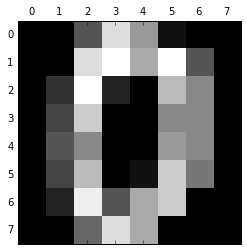

In [20]:
plt.gray() #Gray just changes the scale to grayscale plotting, instead of RGB colors.
plt.matshow(digits.images[0]) 


In [24]:
print digits.target #target has the real labels for each image

[0 1 2 ..., 8 9 8]


In [40]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
clf = SVC()
y = digits.target #The labels are our target
X =  digits.data #The data us our features (1797, 64)
clf.fit(X, y) #This is as vanilla as it gets

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- C: Parameter C that controls the penalty on the Margin
- degree: If we have a polynomial, this sets the degree
- Gamma: Gamma parameter in the RBF equation

Note that the default kernel is RBF and gamma is 'auto', the 'auto' sets up the kernel as 1/n_features, in our case 1/64 = 0.0156

In [41]:
print clf.predict(X)

[0 1 2 ..., 8 9 8]


In [42]:
y_predict = clf.predict(X)
np.sum(y_predict - y) #If each prediction is the same, this should be zero

0

Is perfect, but what will happen if we train with half the data, and test the other half of the data.

In [43]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=30)
#random states are important for repeatability
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(898, 64) (899, 64) (898,) (899,)


In [44]:
clf.kernel

'rbf'

In [46]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.22358175750834261

22% Accuracy means it only gets the right result 22 out of 100 times! Is only marginally better than random guessing.

In [47]:
clf.kernel = 'linear'

In [48]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.98109010011123465

In [50]:
clf.kernel = 'sigmoid'
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.090100111234705224

In [56]:
clf.kernel = 'rbf'
clf.gamma = 1
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)


0.090100111234705224

In [57]:
clf.kernel = 'rbf'
clf.gamma = 0.5
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.090100111234705224

In [58]:
clf.kernel = 'rbf'
clf.gamma = 0.1
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.090100111234705224

In [59]:
clf.kernel = 'rbf'
clf.gamma = 0.01
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.63737486095661844

In [60]:
clf.kernel = 'rbf'
clf.gamma = 0.001
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.9899888765294772

In [61]:
clf.kernel = 'rbf'
clf.gamma = 0.0001
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.967741935483871

In [62]:
clf.kernel = 'rbf'
clf.gamma = 0.00001
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.82313681868743049

In [90]:
from sklearn import grid_search
gamma_list = np.logspace(-3, 3, 5)
print gamma_list
parameters = {'kernel':('linear', 'rbf'), 'gamma':gamma_list}
clgs = grid_search.GridSearchCV(clf, parameters, n_jobs = 5)
clgs.fit(X_train, y_train)

[  1.00000000e-03   3.16227766e-02   1.00000000e+00   3.16227766e+01
   1.00000000e+03]


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=5,
       param_grid={'kernel': ('linear', 'rbf'), 'gamma': array([  1.00000e-03,   3.16228e-02,   1.00000e+00,   3.16228e+01,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [91]:
print clgs.best_estimator_
y_predict = clgs.predict(X_test)
accuracy_score(y_test, y_predict)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0.9899888765294772